# Downloading S&P500 index Price Data 

In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,0.0,0.0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,0.0,0.0
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-09-01 00:00:00-04:00', '2023-09-05 00:00:00-04:00',
               '2023-09-06 00:00:00-04:00', '2023-09-07 00:00:00-04:00',
               '2023-09-08 00:00:00-04:00', '2023-09-11 00:00:00-04:00',
               '2023-09-12 00:00:00-04:00', '2023-09-13 00:00:00-04:00',
               '2023-09-14 00:00:00-04:00', '2023-09-15 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24042, freq=None)

# Cleaning and Visalizating stock market   

<AxesSubplot:xlabel='Date'>

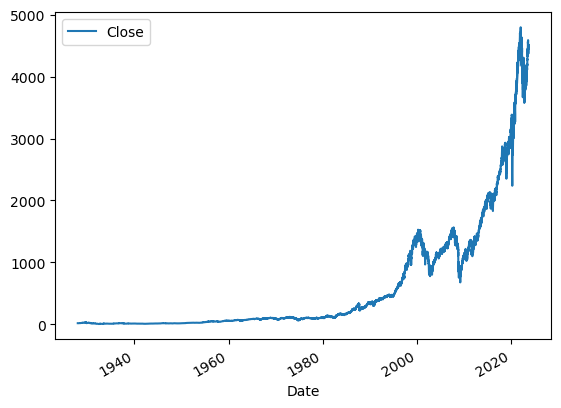

In [6]:
sp500.plot.line(y="Close",use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000


# Setting up our target for Machine Learning

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098


In [10]:
sp500["Target"] = (sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [11]:
sp500 = sp500.loc["1995-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1
...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1


# Training an initial Machine Learining Model 

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [14]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [15]:
preds

Date
2023-04-25 00:00:00-04:00    1
2023-04-26 00:00:00-04:00    0
2023-04-27 00:00:00-04:00    0
2023-04-28 00:00:00-04:00    0
2023-05-01 00:00:00-04:00    1
                            ..
2023-09-11 00:00:00-04:00    1
2023-09-12 00:00:00-04:00    1
2023-09-13 00:00:00-04:00    1
2023-09-14 00:00:00-04:00    1
2023-09-15 00:00:00-04:00    1
Length: 100, dtype: int32

In [16]:
precision_score(test["Target"], preds)

0.5

In [17]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

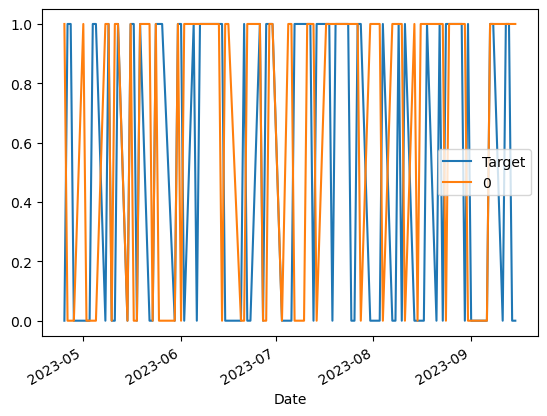

In [18]:
combined.plot()

# Building A Backtesting System

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)    

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

0    2831
1    1896
Name: Predictions, dtype: int64

In [23]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5469409282700421

In [24]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.542627
0    0.457373
Name: Target, dtype: float64

Adding Additional Predictors To Our Model

In [25]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0,1.001739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1,0.999598,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1,1.000369,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1,1.000163,2.0,1.001077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0,1.003350,2.0,1.003529,2.0,1.005383,30.0,1.095670,120.0,1.160684,530.0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1,0.997144,1.0,0.999374,2.0,0.999522,29.0,1.088867,120.0,1.153634,530.0
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1,1.000620,1.0,1.000527,3.0,1.000547,30.0,1.089664,120.0,1.154626,531.0


In [27]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1998-12-16 00:00:00-05:00,1162.829956,1166.290039,1154.689941,1161.939941,725500000,1179.979980,1,0.999617,1.0,1.002113,2.0,1.057997,37.0,1.079900,138.0,1.473186,568.0
1998-12-17 00:00:00-05:00,1161.939941,1180.030029,1161.939941,1179.979980,739400000,1188.030029,1,1.007703,1.0,1.015052,3.0,1.072569,37.0,1.095716,139.0,1.494695,568.0
1998-12-18 00:00:00-05:00,1179.979980,1188.890015,1178.270020,1188.030029,839600000,1202.839966,1,1.003399,2.0,1.018199,3.0,1.077514,38.0,1.102232,139.0,1.503506,569.0
1998-12-21 00:00:00-05:00,1188.030029,1210.880005,1188.030029,1202.839966,744800000,1203.569946,1,1.006194,2.0,1.020113,4.0,1.088346,38.0,1.114881,140.0,1.520820,569.0
1998-12-22 00:00:00-05:00,1202.839966,1209.219971,1192.719971,1203.569946,680500000,1228.540039,1,1.000303,2.0,1.013727,4.0,1.086469,38.0,1.114439,141.0,1.520316,569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-08 00:00:00-04:00,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,4487.459961,1,1.000713,1.0,0.995566,2.0,0.999097,30.0,1.088754,120.0,1.153374,530.0
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0,1.003350,2.0,1.003529,2.0,1.005383,30.0,1.095670,120.0,1.160684,530.0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1,0.997144,1.0,0.999374,2.0,0.999522,29.0,1.088867,120.0,1.153634,530.0


# Improving Our Model

In [28]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions =  backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])